## Apa itu Data Binning ?

__Data Binning__ adalah sebuah proses untuk mengelompokkan data ke dalam bagian-bagian yang lebih kecil yang disebut bin berdasarkan kriteria tertentu. Binning data merupakan salah satu teknik praproses data yang digunakan untuk meminimalisasi kesalahan dalam pengamatan serta terkadang dapat meningkatkan akurasi dari model prediktif.

Binning biasanya digunakan untuk mengelompokkan data numerik menjadi beberapa bin agar sebaran data lebih mudah dipahami. Misalnya kita dapat mengelompokkan fitur “usia” menjadi [0-5], [6-10], [11-15], [16-20], [20-25], dan seterusnya.

Contoh lain misalnya sebuah data yang memiliki fitur "Harga" dengan kisaran 1000 hingga 99000. Kita bisa membagi harga tersebut menjadi tiga bin, "Murah", "Standar", dan "Mahal" dengan batas tertentu.


Ada dua fungsi di Pandas yang dapat digunakan untuk melakukan binning data, yaitu <code>cut()</code> dan <code>qcut()</code>. 

## Load dataset

Dataset yang digunakan adalah dataset <a href='https://archive.ics.uci.edu/ml/datasets/automobile'>Automobile</a> yang berasal dari UCI Machine Learning Repository dengan informasi detail tentang tiap kolom (terurut dari awal sampai akhir) sebagai berikut:

__Attribute Information:__

1. __symboling:__ -3, -2, -1, 0, 1, 2, 3.
2. __normalized-losses:__ continuous from 65 to 256.
3. __make:__
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. __fuel-type:__ diesel, gas.
5. __aspiration:__ std, turbo.
6. __num-of-doors:__ four, two.
7. __body-style:__ hardtop, wagon, sedan, hatchback, convertible.
8. __drive-wheels:__ 4wd, fwd, rwd.
9. __engine-location:__ front, rear.
10. __wheel-base:__ continuous from 86.6 120.9.
11. __length:__ continuous from 141.1 to 208.1.
12. __width:__ continuous from 60.3 to 72.3.
13. __height:__ continuous from 47.8 to 59.8.
14. __curb-weight:__ continuous from 1488 to 4066.
15. __engine-type:__ dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. __num-of-cylinders:__ eight, five, four, six, three, twelve, two.
17. __engine-size:__ continuous from 61 to 326.
18. __fuel-system:__ 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. __bore:__ continuous from 2.54 to 3.94.
20. __stroke:__ continuous from 2.07 to 4.17.
21. __compression-ratio:__ continuous from 7 to 23.
22. __horsepower:__ continuous from 48 to 288.
23. __peak-rpm:__ continuous from 4150 to 6600.
24. __city-mpg:__ continuous from 13 to 49.
25. __highway-mpg:__ continuous from 16 to 54.
26. __price:__ continuous from 5118 to 45400.

<i>import</i> Pandas terlebih dahulu kemudian <i>load</i> dataset ke dalam dataframe Pandas menggunakan <code>read_csv()</code>. Karena dataset tersebut belum memiliki <i>header</i>, ada baiknya tambahkan dahulu <i>header</i> sesuai dengan informasi atribut di atas untuk tiap kolom.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
              'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
              'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
              'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df = pd.read_csv('automobile.data', names=column_names)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Sebelum menerapkan <i>binning</i> sebaiknya menangani <i>missing values</i> terlebih dahulu.

In [5]:
# Mengubah '?' menjadi NaN

df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Mengecek missing values

df.isnull().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

Menghapus baris yang mengandung <i>missing values</i> pada kolom <code>price</code>.

In [7]:
# Menghapus baris yang mengandung mising values di kolom price
df.dropna(subset=['price'], axis=0, inplace=True)

# Me-reset indeks karena ada data yang terhapus
df.reset_index(drop=True, inplace=True)

Selanjutnya, untuk <i>missing values</i> pada kolom <code>normalized-losses</code>, <code>stroke</code>, <code>bore</code>, <code>horsepower</code>, dan <code>peak-rpm</code> akan diganti dengan nilai __mean__-nya, sedangkan <i>missing values</i> di kolom <code>num-of-doors</code> diganti dengan __'four'__.

In [8]:
# Mengganti missing values dengan 'four' untuk kolom num-of-doors

df['num-of-doors'].fillna('four', inplace=True)

In [9]:
# Mengganti missing values dengan mean-nya untuk kolom lainnya

avg_norm = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_norm, inplace=True)

avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_bore, inplace=True)

avg_horse = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horse, inplace=True)

avg_peak = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_norm, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Setelah itu perbaiki tipe datanya.

In [10]:
# Konversi tipe data

df[['bore', 'stroke', 'peak-rpm']] = df[['bore', 'stroke', 'peak-rpm']].astype('float')
df[['normalized-losses', 'horsepower']] = df[['normalized-losses', 'horsepower']].astype('int')
df[['price']] = df[['price']].astype('float')

In [11]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Fungsi cut()

Pertama menggunakan fungsi <code>cut()</code> untuk membagi data menjadi beberapa __bin__. Untuk menentukan batas bin dapat dilakukan dengan berbagai cara. Setidaknya ada tiga cara yang dapat kita lakukan, yaitu dengan <code>linspace()</code>, <code>interval_range()</code>, atau dengan mendefinisikan sendiri batas bin.

Sebelumnya lihat dulu distribusi data dari kolom <code>horsepower</code> menggunakan visualisasi histogram.

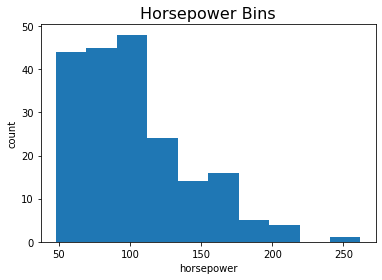

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

df['horsepower'].plot(kind='hist')

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('Horsepower Bins', size=16)
plt.show()

### Menentukan batas bin dengan linspace()

<code>linspace()</code> adalah sebuah fungsi dari __Numpy__ yang digunakan untuk membuat array yang berisi sejumlah angka dengan jarak yang sama. Angka-angka ini yang nantinya akan digunakan sebagai batas untuk tiap kategori. 

Secara umum linspace ditulis : <code>numpy.linspace(start, end, num_of_dividers)</code>.

* __start :__ nilai minimum atau batas bawah data
* __end :__ nilai maksimum atau batas atas data
* __num_of_dividers :__ jumlah pembagi atau jumlah bin yang ingin dihasilkan plus 1

Pada contoh kali ini, akan melakukan <i>binning</i> untuk kolom <code>horsepower</code> yang memiliki nilai berkisar antara 48 sampai 288. Kita akan membaginya menjadi tiga kategori yaitu <b>'Low'</b>, <b>'Medium'</b>, dan <b>'High'</b>.

Karena akan membagi menjadi 3 bin, maka jumlah pembagi batasnya harus ada 4.

In [13]:
# Menentukan batas bin dengan linspace

bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Selanjutnya definisikan nama kategorinya ke dalam variabel, misalnya <code>kategori</code>.

In [14]:
# Membuat nama kategori

kategori = ['Low', 'Medium', 'High']

Lalu aplikasikan fungsi <code>cut()</code> untuk melihat setiap nilai pada kolom <code>horsepower</code> masuk pada kategori apa. Kita akan membuat kolom baru dengan nama <code>horsepower-binned</code> untuk menampung hasil <i>binning</i> data.

In [15]:
# Menerapkan fungsi cut untuk binning data

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=kategori, include_lowest=True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Parameter <code>include_lowest=True</code> akan membuat nilai minimum pada kolom tersebut juga diikutsertakan dalam proses <i>binning</i>. <i>Default</i>-nya adalah __False__. Karena itu, jika tidak di-<i>set</i>, nilai __48__ yang merupakan nilai minimum akan menghasilkan __NaN__ untuk kolom <code>horsepower-binned</code>-nya.

Sekarang lihat jumlah data untuk masing-masing kategori.

In [16]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

### Menentukan batas bin dengan interval_range()

Gunakan <code>interval_range()</code> yang merupakan sebuah fungsi dari Pandas untuk menentukan batasan bin.

Secara umum penggunaan interval_range adalah sebagai berikut: <code>pandas.interval_range(start, freq, end)</code>.

* __start :__ nilai minimum atau batas bawah data
* __freq :__ panjang dari tiap interval
* __end :__ nilai maksimum atau batas atas data

Jumlah bin yang dihasilkan oleh <code>interval_range()</code> tergantung pada __freq__ atau panjang dari tiap intervalnya. 

Defisikan nilai minimumnya adalah <b>0</b>, nilai maksimumnya adalah __300__, dan panjang tiap intervalnya adalah __100__ sehingga nantinya juga akan ada <b>3</b> bin. Panjang interval akan mempengaruhi jumlah bin. Jika misalnya <i>set</i> panjang interval dengan 50, bin yang akan dihasilkan berjumlah 6 bin.

In [17]:
# Menentukan bin dengan interval_range

interval = pd.interval_range(start=0, freq=100, end=300)
interval

IntervalIndex([(0, 100], (100, 200], (200, 300]], dtype='interval[int64, right]')

Untuk membaca interval seperti <code>(0, 100]</code>, <code>(100, 200]</code>, dan seterusnya, tanda kurung <code>()</code> berarti tidak diikutsertakan, sedangkan tanda kurung siku <code>[]</code> berarti diikutsertakan. 

Jadi untuk contoh interval <code>(100, 200]</code> misalnya, __100__ tidak masuk dalam interval, tetapi __200__ masuk dalam interval tersebut. 

Selanjutnya gunakan fungsi <code>cut()</code> untuk <i>binning</i> data. 

__Harap dicatat__ bahwa jika menggunakan <code>interval_range()</code>, tidak dapat memberikan label ('Low', 'Medium', 'High').

In [18]:
# Menerapkan fungsi cut untuk binning data

df['horsepower-binned-2'] = pd.cut(df['horsepower'], bins=interval)
df[['horsepower','horsepower-binned-2']].head(20)

,horsepower,horsepower-binned-2
0,111,"(100, 200]"
1,111,"(100, 200]"
2,154,"(100, 200]"
3,102,"(100, 200]"
4,115,"(100, 200]"
5,110,"(100, 200]"
6,110,"(100, 200]"
7,110,"(100, 200]"
8,140,"(100, 200]"
9,101,"(100, 200]"


Sekarang hitung jumlah data yang masuk ke masing-masing interval.

In [19]:
df['horsepower-binned-2'].value_counts()

(0, 100]      109
(100, 200]     88
(200, 300]      4
Name: horsepower-binned-2, dtype: int64

### Mendefinisikan sendiri batasan bin

Definisikan batas-batas bin yang akan dibuat bisa disesuaikan keinginan dan menggunakan fungsi <code>cut()</code> untuk <i>binning</i> data.

In [20]:
# Menentukan batasan bin sendiri
batas_bin = [0, 80, 160, 300]

# Menentukan kategori
kategori = ['Low', 'Medium', 'High']

# Binning data dengan cut()
df['horsepower-binned-3'] = pd.cut(df['horsepower'], bins=batas_bin, labels=kategori)
df[['horsepower','horsepower-binned-3']].head(20)

,horsepower,horsepower-binned-3
0,111,Medium
1,111,Medium
2,154,Medium
3,102,Medium
4,115,Medium
5,110,Medium
6,110,Medium
7,110,Medium
8,140,Medium
9,101,Medium


Sekarang hitung jumlah data yang masuk ke dalam tiap kategori.

In [21]:
df['horsepower-binned-3'].value_counts()

Medium    121
Low        63
High       17
Name: horsepower-binned-3, dtype: int64

<hr>

## Fungsi qcut()

Selain fungsi <code>cut()</code>, ada juga fungsi <code>qcut()</code> yang dapat digunakan untuk melakukan <i>binning</i> data. Menurut dokumentasi pandas, <code>qcut</code> digambarkan sebagai <i>Quantile-based discretization function</i>. Singkatnya fungsi <code>qcut()</code> ini akan membagi data ke dalam __jumlah yang sama__. Karena itu, jarak untuk masing-masing bin boleh jadi berbeda satu sama lain.

In [22]:
# Mendefinisikan kategori
kategori = ['Low', 'Medium', 'High']

# Menerapkan fungsi qcut untuk binning data
df['horsepower-binned-4'] = pd.qcut(df['horsepower'], q=3, labels=kategori)
df[['horsepower','horsepower-binned-4']].head(20)

,horsepower,horsepower-binned-4
0,111,Medium
1,111,Medium
2,154,High
3,102,Medium
4,115,High
5,110,Medium
6,110,Medium
7,110,Medium
8,140,High
9,101,Medium


Sekarang lihat jumlah data pada masing-masing kategori.

In [23]:
df['horsepower-binned-4'].value_counts()

Low       68
Medium    67
High      66
Name: horsepower-binned-4, dtype: int64

Dari output di atas terlihat bahwa hasil <i>binning</i> data menggunakan <code>qcut()</code> akan menghasilkan jumlah data yang hampir sama pada tiap kategori (Jika jumlah seluruh data bisa dibagi 3, maka jumlahnya akan sama persis).

Kesimpulannya, jika mengharapkan jumlah item yang sama pada masing-masing bin, gunakanlah <code>qcut()</code>. Namun, jika lebih mengutamakan batas angka tertentu untuk tiap bin, gunakanlah <code>cut()</code>.



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


